# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Naily Syafaaturohmah]
- **Email:** [elnaee.sy@gmail.com]
- **ID Dicoding:** [naily_syafaaturohmah]

## Menentukan Pertanyaan Bisnis

- Berapa range rerata AQI di stasiun Aoti Zhongxin, Dongsi, dan Guanyuan selama tahun 2016 dan polutan apa yang paling berpengaruh? (langkah paling urgent)
- Berdasarkan rerata AQI tahunan 2016, termasuk kategori apa ketiga stasiun tersebut?

## Import Semua Packages/Library yang Digunakan

In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

## Data Wrangling

### Gathering Data

Membaca seluruh data dari tiap file yang dibutuhkan. Berdasarkan pertanyaan bisnis di atas, hanya dibutuhkan tiga data dari stasiun Aoti Zhongxin, Dongsi, dan Guan. Pada dasarnya, ketiga stasiun tersebut berada di Beijing dan memiliki potensi keramaian yang tinggi.

In [488]:
aoti = pd.read_csv("All_csv_files/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
dong = pd.read_csv("All_csv_files/PRSA_Data_Dongsi_20130301-20170228.csv")
guan = pd.read_csv("All_csv_files/PRSA_Data_Guanyuan_20130301-20170228.csv")

### Assessing Data

Pada tahap ini, dilakukan penilaian kualitas terhadap data. 

Penggunaan *.drop()* digunakan untuk mem-filter tahun karena data yang akan digunakan hanya data tahun 2016. Penghapusan baris berdasarkan kolom tahun ini sebenarnya lebih tepat pada kategori *Cleaning Data* karena menghapus bagian yang tidak perlu. Akan tetapi, langkah ini lebih baik dilakukan sebelum *Assessing Data* untuk memudahkan penilaian data yang digunakan.

In [489]:
aoti = aoti.drop(aoti[aoti["year"] != 2016].index)
#Memeriksa tipe data dan mengetahui ada atau tidaknya missing value
aoti.info()
#Memanggil metode .isna() untuk mengetahui jumlah missing value
print(aoti.isna().sum())
#Mengetahui ada/tidak duplikasi data
print("Jumlah duplikasi data Aoti Zhongxin: ", aoti.duplicated().sum())
#Statistik data
aoti.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 24864 to 33647
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       8784 non-null   int64  
 1   year     8784 non-null   int64  
 2   month    8784 non-null   int64  
 3   day      8784 non-null   int64  
 4   hour     8784 non-null   int64  
 5   PM2.5    8607 non-null   float64
 6   PM10     8673 non-null   float64
 7   SO2      8650 non-null   float64
 8   NO2      8561 non-null   float64
 9   CO       8656 non-null   float64
 10  O3       8505 non-null   float64
 11  TEMP     8777 non-null   float64
 12  PRES     8777 non-null   float64
 13  DEWP     8777 non-null   float64
 14  RAIN     8777 non-null   float64
 15  wd       8743 non-null   object 
 16  WSPM     8779 non-null   float64
 17  station  8784 non-null   object 
dtypes: float64(11), int64(5), object(2)
memory usage: 1.3+ MB
No           0
year         0
month        0
day          0
hour      

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,8784.000000,8784.0,8784.000000,8784.000000,8784.000000,8607.000000,8673.000000,8650.000000,8561.000000,8656.000000,8505.000000,8777.000000,8777.000000,8777.000000,8777.000000,8779.000000
mean,29256.500000,2016.0,6.513661,15.756831,11.500000,74.104334,94.647988,10.860000,48.450298,1195.506007,62.096884,13.863540,1012.824537,2.286966,0.079765,1.859346
std,2535.866716,0.0,3.451430,8.812031,6.922581,77.178896,87.080304,15.049667,34.250890,1198.947892,60.410226,11.910137,10.537135,14.213596,0.981410,1.174415
min,24865.000000,2016.0,1.000000,1.000000,0.000000,3.000000,4.000000,2.000000,2.000000,100.000000,2.000000,-16.800000,989.700000,-35.300000,0.000000,0.000000
25%,27060.750000,2016.0,4.000000,8.000000,5.750000,18.000000,32.000000,2.000000,22.000000,500.000000,10.000000,3.300000,1003.900000,-9.500000,0.000000,1.000000
50%,29256.500000,2016.0,7.000000,16.000000,11.500000,49.000000,70.000000,5.000000,39.000000,800.000000,50.000000,14.900000,1012.100000,3.400000,0.000000,1.500000
75%,31452.250000,2016.0,10.000000,23.000000,17.250000,102.000000,127.000000,13.000000,67.000000,1400.000000,88.000000,24.200000,1021.200000,14.900000,0.000000,2.400000
max,33648.000000,2016.0,12.000000,31.000000,23.000000,898.000000,884.000000,341.000000,218.000000,10000.000000,350.000000,37.300000,1042.000000,27.300000,46.400000,8.900000


Melakukan hal yang sama untuk data Stasiun Dongsi

In [490]:
dong = dong.drop(dong[dong["year"] != 2016].index)
dong.info()
print(dong.isna().sum())
print("Jumlah duplikasi data Dongsi: ", dong.duplicated().sum())
dong.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 24864 to 33647
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       8784 non-null   int64  
 1   year     8784 non-null   int64  
 2   month    8784 non-null   int64  
 3   day      8784 non-null   int64  
 4   hour     8784 non-null   int64  
 5   PM2.5    8431 non-null   float64
 6   PM10     8484 non-null   float64
 7   SO2      8480 non-null   float64
 8   NO2      8467 non-null   float64
 9   CO       8466 non-null   float64
 10  O3       8464 non-null   float64
 11  TEMP     8777 non-null   float64
 12  PRES     8777 non-null   float64
 13  DEWP     8777 non-null   float64
 14  RAIN     8777 non-null   float64
 15  wd       8743 non-null   object 
 16  WSPM     8779 non-null   float64
 17  station  8784 non-null   object 
dtypes: float64(11), int64(5), object(2)
memory usage: 1.3+ MB
No           0
year         0
month        0
day          0
hour      

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,8784.000000,8784.0,8784.000000,8784.000000,8784.000000,8431.000000,8484.000000,8480.000000,8467.000000,8466.000000,8464.000000,8777.000000,8777.000000,8777.000000,8777.000000,8779.000000
mean,29256.500000,2016.0,6.513661,15.756831,11.500000,80.225952,103.032885,11.541863,51.103106,1239.759036,56.105742,13.863540,1012.824537,2.286966,0.079765,1.859346
std,2535.866716,0.0,3.451430,8.812031,6.922581,82.959385,96.463361,14.406599,33.195213,1141.566944,53.857856,11.910137,10.537135,14.213596,0.981410,1.174415
min,24865.000000,2016.0,1.000000,1.000000,0.000000,3.000000,5.000000,2.000000,2.000000,100.000000,2.000000,-16.800000,989.700000,-35.300000,0.000000,0.000000
25%,27060.750000,2016.0,4.000000,8.000000,5.750000,20.000000,36.000000,2.000000,25.000000,500.000000,9.000000,3.300000,1003.900000,-9.500000,0.000000,1.000000
50%,29256.500000,2016.0,7.000000,16.000000,11.500000,54.000000,76.000000,6.000000,44.000000,900.000000,46.000000,14.900000,1012.100000,3.400000,0.000000,1.500000
75%,31452.250000,2016.0,10.000000,23.000000,17.250000,109.000000,135.000000,15.000000,69.000000,1500.000000,81.250000,24.200000,1021.200000,14.900000,0.000000,2.400000
max,33648.000000,2016.0,12.000000,31.000000,23.000000,695.000000,891.000000,278.000000,210.000000,9900.000000,342.000000,37.300000,1042.000000,27.300000,46.400000,8.900000


Melakukan hal yang sama untuk data Stasiun Guanyuan

In [491]:
guan = guan.drop(guan[guan["year"] != 2016].index)
guan.info()
print(guan.isna().sum())
print("Jumlah duplikasi data Guanyuan: ", guan.duplicated().sum())
guan.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 24864 to 33647
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       8784 non-null   int64  
 1   year     8784 non-null   int64  
 2   month    8784 non-null   int64  
 3   day      8784 non-null   int64  
 4   hour     8784 non-null   int64  
 5   PM2.5    8644 non-null   float64
 6   PM10     8675 non-null   float64
 7   SO2      8715 non-null   float64
 8   NO2      8713 non-null   float64
 9   CO       8604 non-null   float64
 10  O3       8706 non-null   float64
 11  TEMP     8777 non-null   float64
 12  PRES     8777 non-null   float64
 13  DEWP     8777 non-null   float64
 14  RAIN     8777 non-null   float64
 15  wd       8743 non-null   object 
 16  WSPM     8779 non-null   float64
 17  station  8784 non-null   object 
dtypes: float64(11), int64(5), object(2)
memory usage: 1.3+ MB
No           0
year         0
month        0
day          0
hour      

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,8784.000000,8784.0,8784.000000,8784.000000,8784.000000,8644.000000,8675.000000,8715.000000,8713.000000,8604.000000,8706.000000,8777.000000,8777.000000,8777.000000,8777.000000,8779.000000
mean,29256.500000,2016.0,6.513661,15.756831,11.500000,77.136164,104.685072,11.496156,53.537473,1172.849837,54.937859,13.863540,1012.824537,2.286966,0.079765,1.859346
std,2535.866716,0.0,3.451430,8.812031,6.922581,78.113687,90.514048,14.195925,33.640383,1079.764189,57.067715,11.910137,10.537135,14.213596,0.981410,1.174415
min,24865.000000,2016.0,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,2.000000,100.000000,2.000000,-16.800000,989.700000,-35.300000,0.000000,0.000000
25%,27060.750000,2016.0,4.000000,8.000000,5.750000,20.000000,37.000000,2.000000,28.000000,500.000000,5.000000,3.300000,1003.900000,-9.500000,0.000000,1.000000
50%,29256.500000,2016.0,7.000000,16.000000,11.500000,53.000000,83.000000,6.000000,46.000000,900.000000,41.000000,14.900000,1012.100000,3.400000,0.000000,1.500000
75%,31452.250000,2016.0,10.000000,23.000000,17.250000,107.000000,140.000000,15.000000,72.000000,1400.000000,78.000000,24.200000,1021.200000,14.900000,0.000000,2.400000
max,33648.000000,2016.0,12.000000,31.000000,23.000000,639.000000,906.000000,277.000000,225.000000,9300.000000,335.000000,37.300000,1042.000000,27.300000,46.400000,8.900000


### Cleaning Data

Berdasarkan output *Assessing Data*, tidak terjadi duplikasi data sama sekali dan *missing value* terjadi di setiap data polutan. 

Kolom **TEMP** sampai dengan **WSPM** dapat dihapus karena tidak digunakan untuk menjawab pertanyaan di atas sehingga bukan merupakan parameter yang dibutuhkan. 

Sebagai catatan, *cleaning inaccurate value* tidak dilakukan di sini karena lonjakan nilai polutan yang sangat besar di suatu waktu bisa saja terjadi bergantung pada kondisi wilayah saat itu.

Berdasarkan [referensi](https://www.airnow.gov/sites/default/files/2020-05/aqi-technical-assistance-document-sept2018.pdf) penghitungan nilai AQI yang dipakai, nilai **CO** dan **O3** akan lebih masuk akal jika menggunakan nilai data asli dibagi 1000. Hal ini dapat dikarenakan satuan yang digunakan oleh data dan referensi berbeda. Sayangnya, tidak ada keterangan di dalam file csv dataset yang menyebutkan satuan yang digunakan sehingga pembagian dengan nilai 1000 ini merupakan perkiraan.

In [492]:
#Menghapus kolom yang tidak diperlukan
#Memberikan perintah print agar dapat terlihat
aoti = aoti.drop(aoti.columns[11:17], axis=1)
print(aoti)

##Menangani missing value
#Berdasarkan assessing data, diketahui bahwa terdapat ketidaksesuaian jumlah data
#Memanggil fungsi berikut untuk mengetahui isi dari setiap nilai yang kosong di semua kolom
blank_aoti = aoti[aoti.isnull().any(axis=1)]
print(blank_aoti)

#Mengganti seluruh nilai yang kosong (NaN) dengan nilai 0
aoti.fillna(0, inplace=True)

#Mengecek ulang missing value
print(aoti.isna().sum())

#Membagi nilai kolom CO dan O3 dengan 1000 agar sesuai dengan satuan yang umum digunakan
aoti['CO'] = aoti['CO']/1000
aoti['O3'] = aoti['O3']/1000
print(aoti)

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO    O3  \
24864  24865  2016      1    1     0  209.0  268.0  47.0  123.0  5300.0  13.0   
24865  24866  2016      1    1     1  211.0  248.0  66.0  119.0  5400.0  16.0   
24866  24867  2016      1    1     2  167.0  192.0  64.0  115.0  4300.0  12.0   
24867  24868  2016      1    1     3  136.0  159.0  56.0  111.0  4100.0   9.0   
24868  24869  2016      1    1     4  108.0  121.0  46.0  107.0  3600.0   7.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...   ...   
33643  33644  2016     12   31    19  381.0  395.0  12.0  184.0  4900.0   4.0   
33644  33645  2016     12   31    20  385.0  402.0  11.0  181.0  5300.0   3.0   
33645  33646  2016     12   31    21  409.0  444.0   9.0  163.0  5300.0   3.0   
33646  33647  2016     12   31    22  451.0  483.0   9.0  147.0  5000.0   3.0   
33647  33648  2016     12   31    23  472.0  504.0   9.0  140.0  5400.0   3.0   

            station  
24864

Melakukan hal yang sama untuk data Dongsi

In [493]:
dong = dong.drop(dong.columns[11:17], axis=1)
print(dong)

blank_dong = dong[dong.isnull().any(axis=1)]
print(blank_dong)

dong.fillna(0, inplace=True)
print(dong.isna().sum())

dong['CO'] = dong['CO']/1000
dong['O3'] = dong['O3']/1000
print(dong)

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO   O3  \
24864  24865  2016      1    1     0  200.0  209.0  31.0   98.0  3400.0  2.0   
24865  24866  2016      1    1     1  193.0  203.0  46.0   97.0  3400.0  3.0   
24866  24867  2016      1    1     2  219.0  237.0  49.0  102.0  3700.0  3.0   
24867  24868  2016      1    1     3  187.0  196.0  40.0   94.0  3100.0  3.0   
24868  24869  2016      1    1     4  160.0  160.0  35.0   91.0  3100.0  2.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...  ...   
33643  33644  2016     12   31    19  423.0  530.0  16.0  141.0  6600.0  2.0   
33644  33645  2016     12   31    20  453.0  589.0  14.0  137.0  6600.0  2.0   
33645  33646  2016     12   31    21  473.0  605.0  14.0  130.0  6800.0  2.0   
33646  33647  2016     12   31    22  492.0  634.0  17.0  123.0  6900.0  2.0   
33647  33648  2016     12   31    23  513.0  613.0  12.0  100.0  8100.0  2.0   

      station  
24864  Dongsi  
24865  

Melakukan hal yang sama untuk data Guanyuan

In [494]:
guan = guan.drop(guan.columns[11:17], axis=1)
print(guan)

blank_guan = guan[guan.isnull().any(axis=1)]
print(blank_guan)

guan.fillna(0, inplace=True)
print(guan.isna().sum())

guan['CO'] = guan['CO']/1000
guan['O3'] = guan['O3']/1000
print(guan)

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2      CO   O3  \
24864  24865  2016      1    1     0  183.0  244.0  54.0  118.0  5400.0  6.0   
24865  24866  2016      1    1     1  193.0  233.0  54.0  113.0  4900.0  4.0   
24866  24867  2016      1    1     2  181.0  203.0  54.0  110.0  4100.0  4.0   
24867  24868  2016      1    1     3  148.0  151.0  47.0  102.0  3000.0  4.0   
24868  24869  2016      1    1     4  111.0  111.0  36.0   95.0  2300.0  3.0   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...     ...  ...   
33643  33644  2016     12   31    19  421.0  485.0  21.0  160.0  4300.0  2.0   
33644  33645  2016     12   31    20  443.0  518.0  19.0  150.0  4500.0  2.0   
33645  33646  2016     12   31    21  466.0  544.0  18.0  140.0  4700.0  2.0   
33646  33647  2016     12   31    22  497.0  570.0  15.0  133.0  5100.0  2.0   
33647  33648  2016     12   31    23  496.0  552.0  11.0  115.0  5600.0  2.0   

        station  
24864  Guanyuan  
248

## Exploratory Data Analysis (EDA)

### Explore Air Quality Dataset

**Menuliskan rumus penghitungan AQI yang akan digunakan beserta keterangannya.**

***Ip = (IHi-ILo)(Cp-BPLo)/(BPHi-BPLo)+ILo***

*Ip* = the index for pollutant *p*; 

*Cp* = the truncated concentration of pollutant *p*;

*BPHi* = the concentration breakpoint that is greater than or equal to *Cp*;

*BPLo* = the concentration breakpoint that is less than or equal to *Cp*;

*IHi* = the AQI value corresponding to *BPHi*;

*ILo* = the AQI value corresponding to *BPLo* 

Mengelompokkan data tiap stasiun berdasarkan bulannya. Hal ini dilakukan untuk memperoleh data per bulan yang dibutuhkan untuk menjawab pertanyaan.

In [495]:
#Aoti Zhongxin Station
aoti_month = aoti.groupby(by="month")
aoti_month_1 = aoti_month.get_group(1)
aoti_month_2 = aoti_month.get_group(2)
aoti_month_3 = aoti_month.get_group(3)
aoti_month_4 = aoti_month.get_group(4)
aoti_month_5 = aoti_month.get_group(5)
aoti_month_6 = aoti_month.get_group(6)
aoti_month_7 = aoti_month.get_group(7)
aoti_month_8 = aoti_month.get_group(8)
aoti_month_9 = aoti_month.get_group(9)
aoti_month_10 = aoti_month.get_group(10)
aoti_month_11 = aoti_month.get_group(11)
aoti_month_12 = aoti_month.get_group(12)
#Mencoba melihat output
print(aoti_month_1)

#Dongsi Station
dong_month = dong.groupby(by="month")
dong_month_1 = dong_month.get_group(1)
dong_month_2 = dong_month.get_group(2)
dong_month_3 = dong_month.get_group(3)
dong_month_4 = dong_month.get_group(4)
dong_month_5 = dong_month.get_group(5)
dong_month_6 = dong_month.get_group(6)
dong_month_7 = dong_month.get_group(7)
dong_month_8 = dong_month.get_group(8)
dong_month_9 = dong_month.get_group(9)
dong_month_10 = dong_month.get_group(10)
dong_month_11 = dong_month.get_group(11)
dong_month_12 = dong_month.get_group(12)

#Guanyuan Station
guan_month = guan.groupby(by="month")
guan_month_1 = guan_month.get_group(1)
guan_month_2 = guan_month.get_group(2)
guan_month_3 = guan_month.get_group(3)
guan_month_4 = guan_month.get_group(4)
guan_month_5 = guan_month.get_group(5)
guan_month_6 = guan_month.get_group(6)
guan_month_7 = guan_month.get_group(7)
guan_month_8 = guan_month.get_group(8)
guan_month_9 = guan_month.get_group(9)
guan_month_10 = guan_month.get_group(10)
guan_month_11 = guan_month.get_group(11)
guan_month_12 = guan_month.get_group(12)

          No  year  month  day  hour  PM2.5   PM10   SO2    NO2   CO     O3  \
24864  24865  2016      1    1     0  209.0  268.0  47.0  123.0  5.3  0.013   
24865  24866  2016      1    1     1  211.0  248.0  66.0  119.0  5.4  0.016   
24866  24867  2016      1    1     2  167.0  192.0  64.0  115.0  4.3  0.012   
24867  24868  2016      1    1     3  136.0  159.0  56.0  111.0  4.1  0.009   
24868  24869  2016      1    1     4  108.0  121.0  46.0  107.0  3.6  0.007   
...      ...   ...    ...  ...   ...    ...    ...   ...    ...  ...    ...   
25603  25604  2016      1   31    19   13.0   29.0  12.0   38.0  0.7  0.048   
25604  25605  2016      1   31    20   17.0   40.0  14.0   40.0  0.7  0.046   
25605  25606  2016      1   31    21   19.0   36.0  18.0   35.0  0.8  0.050   
25606  25607  2016      1   31    22   12.0   29.0  11.0   44.0  0.6  0.040   
25607  25608  2016      1   31    23   15.0   30.0  23.0   36.0  0.8  0.046   

            station  
24864  Aotizhongxin  
24865  

Mendefinisikan fungsi variabel baru untuk mengetahui rata-rata nilai polutan per harinya.

Hal ini dilakukan karena untuk menghitung nilai AQI setiap bulannya, dibutuhkan nilai AQI polutan per hari yang juga membutuhkan nilai rerata polutan setiap harinya.

Pada fungsi di bawah, digunakan *.round()* untuk membulatkan nilai rerata sesuai yang dibutuhkan.

In [496]:
def new_monthly_df(month):
    def rata2_pm25_harian(month):
        return month['PM2.5'].mean().round(1)
    rata2_pm25_daily = month.groupby(by="day").apply(rata2_pm25_harian)

    def rata2_pm10_harian(month):
        return month['PM10'].mean().round(0)
    rata2_pm10_daily = month.groupby(by="day").apply(rata2_pm10_harian)

    def rata2_so2_harian(month):
        return month['SO2'].mean().round(0)
    rata2_so2_daily = month.groupby(by="day").apply(rata2_so2_harian)

    def rata2_no2_harian(month):
        return month['NO2'].mean().round(0)
    rata2_no2_daily = month.groupby(by="day").apply(rata2_no2_harian)

    def rata2_co_harian(month):
        return month['CO'].mean().round(1)
    rata2_co_daily = month.groupby(by="day").apply(rata2_co_harian)

    def rata2_o3_harian(month):
        return month['O3'].mean().round(3)
    rata2_o3_daily = month.groupby(by="day").apply(rata2_o3_harian)

    #Membuat data frame baru dengan isian berupa rerata nilai polutan perhari
    fill = pd.DataFrame({'PM2.5_mean':rata2_pm25_daily,
                        'PM10_mean':rata2_pm10_daily,
                        'SO2_mean':rata2_so2_daily,
                        'NO2_mean':rata2_no2_daily,
                        'CO_mean':rata2_co_daily,
                        'O3_mean':rata2_o3_daily
                        })
    return (fill)

#Misal memanggil fungsi di atas untuk mengetahui rata-rata nilai polutan di Aoti Zhongxin bulan 1 beserta outputnya
new_monthly_df(aoti_month_1)

,PM2.5_mean,PM10_mean,SO2_mean,NO2_mean,CO_mean,O3_mean
day,,,,,,
1,165.0,195.0,46.0,123.0,3.9,0.011
2,272.8,289.0,50.0,144.0,5.6,0.014
3,263.4,269.0,22.0,106.0,4.3,0.014
4,45.5,47.0,8.0,41.0,1.2,0.046
5,31.2,42.0,8.0,47.0,1.0,0.035
6,23.9,38.0,12.0,44.0,1.0,0.036
7,11.9,23.0,8.0,28.0,0.6,0.048
8,31.0,46.0,14.0,45.0,0.9,0.038
9,68.0,84.0,26.0,86.0,1.8,0.016


Memperbarui Data Frame setiap stasiun yang telah memiliki nilai rerata polutan per hari.

In [497]:
#Aoti Zhongxin Station
new_aoti1 = new_monthly_df(aoti_month_1)
new_aoti2 = new_monthly_df(aoti_month_2)
new_aoti3 = new_monthly_df(aoti_month_3)
new_aoti4 = new_monthly_df(aoti_month_4)
new_aoti5 = new_monthly_df(aoti_month_5)
new_aoti6 = new_monthly_df(aoti_month_6)
new_aoti7 = new_monthly_df(aoti_month_7)
new_aoti8 = new_monthly_df(aoti_month_8)
new_aoti9 = new_monthly_df(aoti_month_9)
new_aoti10 = new_monthly_df(aoti_month_10)
new_aoti11 = new_monthly_df(aoti_month_11)
new_aoti12 = new_monthly_df(aoti_month_12)
#Mengecek output
print(new_aoti1)

#Dongsi Station
new_dong1 = new_monthly_df(dong_month_1)
new_dong2 = new_monthly_df(dong_month_2)
new_dong3 = new_monthly_df(dong_month_3)
new_dong4 = new_monthly_df(dong_month_4)
new_dong5 = new_monthly_df(dong_month_5)
new_dong6 = new_monthly_df(dong_month_6)
new_dong7 = new_monthly_df(dong_month_7)
new_dong8 = new_monthly_df(dong_month_8)
new_dong9 = new_monthly_df(dong_month_9)
new_dong10 = new_monthly_df(dong_month_10)
new_dong11 = new_monthly_df(dong_month_11)
new_dong12 = new_monthly_df(dong_month_12)

#Guanyuan Station
new_guan1 = new_monthly_df(guan_month_1)
new_guan2 = new_monthly_df(guan_month_2)
new_guan3 = new_monthly_df(guan_month_3)
new_guan4 = new_monthly_df(guan_month_4)
new_guan5 = new_monthly_df(guan_month_5)
new_guan6 = new_monthly_df(guan_month_6)
new_guan7 = new_monthly_df(guan_month_7)
new_guan8 = new_monthly_df(guan_month_8)
new_guan9 = new_monthly_df(guan_month_9)
new_guan10 = new_monthly_df(guan_month_10)
new_guan11 = new_monthly_df(guan_month_11)
new_guan12 = new_monthly_df(guan_month_12)

     PM2.5_mean  PM10_mean  SO2_mean  NO2_mean  CO_mean  O3_mean
day                                                             
1         165.0      195.0      46.0     123.0      3.9    0.011
2         272.8      289.0      50.0     144.0      5.6    0.014
3         263.4      269.0      22.0     106.0      4.3    0.014
4          45.5       47.0       8.0      41.0      1.2    0.046
5          31.2       42.0       8.0      47.0      1.0    0.035
6          23.9       38.0      12.0      44.0      1.0    0.036
7          11.9       23.0       8.0      28.0      0.6    0.048
8          31.0       46.0      14.0      45.0      0.9    0.038
9          68.0       84.0      26.0      86.0      1.8    0.016
10         43.7       59.0      19.0      67.0      1.6    0.024
11         11.2       26.0       2.0      25.0      0.7    0.051
12         12.8       26.0       9.0      30.0      0.7    0.046
13         19.6       44.0      14.0      53.0      0.9    0.036
14         60.5       88.

Mendefinisikan variabel baru untuk menghitung AQI dalam satu bulan untuk setiap polutan. Nilai AQI akan tertulis berupa **integer**.

Nilai setiap variabel untuk rumus dapat berbeda di setiap datanya bergantung pada nilai polutan. Oleh karena itu, digunakan *if* dan *elif* yang akan mengeksekusi rumus menggunakan variabel dengan kondisi tertentu.

In [498]:
def aqi_month(new_month):
    def aqi_pm25(Cp):
        if 0.0 <= Cp <=12.0:
            IHi = 50.0
            ILo = 0.0
            BPHi = 12.0
            BPLo = 0.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 12.0 <= Cp <=35.4:
            IHi = 100.0
            ILo = 51.0
            BPHi = 35.4
            BPLo = 12.1
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 35.4 <= Cp <=55.4:
            IHi = 150.0
            ILo = 101.0
            BPHi = 55.4
            BPLo = 35.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 55.4 <= Cp <=150.4:
            IHi = 200.0
            ILo = 151.0
            BPHi = 150.4
            BPLo = 55.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 150.4 <= Cp <=250.4:
            IHi = 300.0
            ILo = 201.0
            BPHi = 250.4
            BPLo = 150.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 250.4 <= Cp <=350.4:
            IHi = 400.0
            ILo = 301.0
            BPHi = 350.4
            BPLo = 250.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 350.4 <= Cp <=500.4:
            IHi = 500.0
            ILo = 401.0
            BPHi = 500.4
            BPLo = 350.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
    daily_aqi_pm25 = new_month['PM2.5_mean'].apply(aqi_pm25).round().astype(int)

    def aqi_pm10(Cp):
        if 0.0 <= Cp <=54.0:
            IHi = 50.0
            ILo = 0.0
            BPHi = 54.0
            BPLo = 0.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 55.0 <= Cp <= 154.0:
            IHi = 100.0
            ILo = 51.0
            BPHi = 154.0
            BPLo = 55.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 155.0 <= Cp <= 254.0:
            IHi = 150.0
            ILo = 101.0
            BPHi = 254.0
            BPLo = 155.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 255.0 <= Cp <=354.0:
            IHi = 200.0
            ILo = 151.0
            BPHi = 354.0
            BPLo = 255.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 355.0 <= Cp <= 424.0:
            IHi = 300.0
            ILo = 201.0
            BPHi = 424.0
            BPLo = 355.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 425.0 <= Cp <= 504.0:
            IHi = 400.0
            ILo = 301.0
            BPHi = 504.0
            BPLo = 425.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 505.0 <= Cp <= 604.0:
            IHi = 500.0
            ILo = 401.0
            BPHi = 604.0
            BPLo = 505.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
    daily_aqi_pm10 = new_month['PM10_mean'].apply(aqi_pm10).round().astype(int)

    def aqi_so2(Cp):
        if 0.0 <= Cp <=35.0:
            IHi = 50.0
            ILo = 0.0
            BPHi = 35.0
            BPLo = 0.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 36.0 <= Cp <= 75.0:
            IHi = 100.0
            ILo = 51.0
            BPHi = 75.0
            BPLo = 36.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 76.0 <= Cp <= 185.0:
            IHi = 150.0
            ILo = 101.0
            BPHi = 185.0
            BPLo = 76.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 186.0 <= Cp <=304.0:
            IHi = 200.0
            ILo = 151.0
            BPHi = 304.0
            BPLo = 186.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 305.0 <= Cp <= 604.0:
            IHi = 300.0
            ILo = 201.0
            BPHi = 604.0
            BPLo = 305.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 605.0 <= Cp <= 804.0:
            IHi = 400.0
            ILo = 301.0
            BPHi = 804.0
            BPLo = 605.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 805.0 <= Cp <= 1004.0:
            IHi = 500.0
            ILo = 401.0
            BPHi = 1004.0
            BPLo = 805.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
    daily_aqi_so2 = new_month['SO2_mean'].apply(aqi_so2).round().astype(int)

    def aqi_no2(Cp):
        if 0.0 <= Cp <=53.0:
            IHi = 50.0
            ILo = 0.0
            BPHi = 53.0
            BPLo = 0.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 54.0 <= Cp <= 100.0:
            IHi = 100.0
            ILo = 51.0
            BPHi = 100.0
            BPLo = 54.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 101.0 <= Cp <= 360.0:
            IHi = 150.0
            ILo = 101.0
            BPHi = 360.0
            BPLo = 101.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 361.0 <= Cp <=649.0:
            IHi = 200.0
            ILo = 151.0
            BPHi = 649.0
            BPLo = 361.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 650.0 <= Cp <= 1249.0:
            IHi = 300.0
            ILo = 201.0
            BPHi = 1249.0
            BPLo = 650.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 1250.0 <= Cp <= 1649.0:
            IHi = 400.0
            ILo = 301.0
            BPHi = 1649.0
            BPLo = 1250.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 1650.0 <= Cp <= 2049.0:
            IHi = 500.0
            ILo = 401.0
            BPHi = 2049.0
            BPLo = 1650.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
    daily_aqi_no2 = new_month['NO2_mean'].apply(aqi_no2).round().astype(int)

    def aqi_co(Cp):
        if 0.0 <= Cp <= 4.4:
            IHi = 50.0
            ILo = 0.0
            BPHi = 4.4
            BPLo = 0.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 4.5 <= Cp <= 9.4:
            IHi = 100.0
            ILo = 51.0
            BPHi = 9.4
            BPLo = 4.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 9.5 <= Cp <= 12.4:
            IHi = 150.0
            ILo = 101.0
            BPHi = 12.4
            BPLo = 9.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 12.5 <= Cp <= 15.4:
            IHi = 200.0
            ILo = 151.0
            BPHi = 15.4
            BPLo = 12.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 15.5 <= Cp <= 30.4:
            IHi = 300.0
            ILo = 201.0
            BPHi = 30.4
            BPLo = 15.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 30.5 <= Cp <= 40.4:
            IHi = 400.0
            ILo = 301.0
            BPHi = 40.4
            BPLo = 30.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 40.5 <= Cp <= 50.4:
            IHi = 500.0
            ILo = 401.0
            BPHi = 50.4
            BPLo = 40.5
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
    daily_aqi_co = new_month['CO_mean'].apply(aqi_co).round().astype(int)

    def aqi_o3(Cp):
        if Cp < 0.125:
            return 0
        elif 0.125 <= Cp <= 0.164:
            IHi = 150.0
            ILo = 101.0
            BPHi = 0.164
            BPLo = 0.125
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 0.165 <= Cp <= 0.204:
            IHi = 200.0
            ILo = 151.0
            BPHi = 0.204
            BPLo = 0.165
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 0.205 <= Cp <= 0.404:
            IHi = 300.0
            ILo = 201.0
            BPHi = 424.0
            BPLo = 355.0
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 0.405 <= Cp <= 0.504:
            IHi = 400.0
            ILo = 301.0
            BPHi = 0.504
            BPLo = 0.405
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
        elif 0.505 <= Cp <= 0.604:
            IHi = 500.0
            ILo = 401.0
            BPHi = 0.604
            BPLo = 0.505
            Ip = ((IHi-ILo)*(Cp-BPLo)/(BPHi-BPLo))+ILo
            return (Ip)
    daily_aqi_o3 = new_month['O3_mean'].apply(aqi_o3).round().astype(int)

    #Membuat data frame baru berisi nilai AQI setiap polutan per harinya
    daily_aqi = pd.DataFrame({'PM2.5_AQI':daily_aqi_pm25,
                            'PM10_AQI':daily_aqi_pm10,
                            'SO2_AQI':daily_aqi_so2,
                            'NO2_AQI':daily_aqi_no2,
                            'CO_AQI':daily_aqi_co,
                            'O3_AQI':daily_aqi_o3
                            })
    return (daily_aqi)

#Mencoba memanggil variabel untuk mengetahui output
print (aqi_month(new_aoti1))

     PM2.5_AQI  PM10_AQI  SO2_AQI  NO2_AQI  CO_AQI  O3_AQI
day                                                       
1          215       121       64      105      44       0
2          323       168       69      109      62       0
3          314       158       31      102      49       0
4          126        44       11       39      14       0
5           91        39       11       44      11       0
6           76        35       17       42      11       0
7           50        21       11       26       7       0
8           91        43       20       42      10       0
9          157        65       37       85      20       0
10         121        53       27       65      18       0
11          47        24        3       24       8       0
12          52        24       13       28       8       0
13          67        41       20       50      10       0
14         154        67       36       83      19       0
15         168        84       50       99      27      

Membuat Data Frame baru berisi rerata AQI berdasarkan setiap polutan setiap bulannya.

Rerata AQI dalam satu bulan diperoleh dari hasil rata-rata AQI setiap harinya dalam satu bulan dan hasilnya dibulatkan dengan tipe integer.

In [499]:
aoti_aqi = pd.concat([aqi_month(new_aoti1).mean().round().astype(int),
                    aqi_month(new_aoti2).mean().round().astype(int),
                    aqi_month(new_aoti3).mean().round().astype(int),
                    aqi_month(new_aoti4).mean().round().astype(int),
                    aqi_month(new_aoti5).mean().round().astype(int),
                    aqi_month(new_aoti6).mean().round().astype(int),
                    aqi_month(new_aoti7).mean().round().astype(int),
                    aqi_month(new_aoti8).mean().round().astype(int),
                    aqi_month(new_aoti9).mean().round().astype(int),
                    aqi_month(new_aoti10).mean().round().astype(int),
                    aqi_month(new_aoti11).mean().round().astype(int),
                    aqi_month(new_aoti12).mean().round().astype(int)
                    ], axis=1)
#Memberi label sesuai nama bulan
aoti_aqi.columns = ['Jan', 'Feb','Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ag', 'Sep', 'Okt', 'Nov', 'Des']
print(aoti_aqi)
print('')

dong_aqi = pd.concat([aqi_month(new_dong1).mean().round().astype(int),
                    aqi_month(new_dong2).mean().round().astype(int),
                    aqi_month(new_dong3).mean().round().astype(int),
                    aqi_month(new_dong4).mean().round().astype(int),
                    aqi_month(new_dong5).mean().round().astype(int),
                    aqi_month(new_dong6).mean().round().astype(int),
                    aqi_month(new_dong7).mean().round().astype(int),
                    aqi_month(new_dong8).mean().round().astype(int),
                    aqi_month(new_dong9).mean().round().astype(int),
                    aqi_month(new_dong10).mean().round().astype(int),
                    aqi_month(new_dong11).mean().round().astype(int),
                    aqi_month(new_dong12).mean().round().astype(int)
                    ], axis=1)
dong_aqi.columns = ['Jan', 'Feb','Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ag', 'Sep', 'Okt', 'Nov', 'Des']
print(dong_aqi)
print('')

guan_aqi = pd.concat([aqi_month(new_guan1).mean().round().astype(int),
                    aqi_month(new_guan2).mean().round().astype(int),
                    aqi_month(new_guan3).mean().round().astype(int),
                    aqi_month(new_guan4).mean().round().astype(int),
                    aqi_month(new_guan5).mean().round().astype(int),
                    aqi_month(new_guan6).mean().round().astype(int),
                    aqi_month(new_guan7).mean().round().astype(int),
                    aqi_month(new_guan8).mean().round().astype(int),
                    aqi_month(new_guan9).mean().round().astype(int),
                    aqi_month(new_guan10).mean().round().astype(int),
                    aqi_month(new_guan11).mean().round().astype(int),
                    aqi_month(new_guan12).mean().round().astype(int)
                    ], axis=1)
guan_aqi.columns = ['Jan', 'Feb','Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ag', 'Sep', 'Okt', 'Nov', 'Des']
print(guan_aqi)

           Jan  Feb  Mar  Apr  Mei  Jun  Jul   Ag  Sep  Okt  Nov  Des
PM2.5_AQI  127   96  156  131  124  128  141  114  114  149  166  195
PM10_AQI    63   47   98   78   60   56   58   42   52   70   85   95
SO2_AQI     31   25   31   16   13    8    5    4    4    5   14   26
NO2_AQI     51   31   46   33   28   26   32   36   43   60   69   77
CO_AQI      20   11   15    9    7    8    9    8    7   13   22   28
O3_AQI       0    0    0    0   29   54   27   15    0    0    0    0

           Jan  Feb  Mar  Apr  Mei  Jun  Jul   Ag  Sep  Okt  Nov  Des
PM2.5_AQI  129   94  154  141  137  126  128  120  119  150  174  211
PM10_AQI    64   48   91   79   63   54   53   48   52   77   93  126
SO2_AQI     28   22   28   15   13    7    6    4    6    9   21   31
NO2_AQI     48   32   52   41   38   34   29   37   47   60   67   74
CO_AQI      17   10   14    9    9    8   10   11   10   14   21   29
O3_AQI       0    0    0    0   19   20   15    7    0    0    0    0

           Jan  Fe

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
#### Berapa range rerata AQI di stasiun Aoti Zhongxin, Dongsi, dan Guanyuan selama tahun 2016 dan polutan apa yang paling berpengaruh?

Menambah kolom rerata AQI setiap bulan dan kolom polutan yang memengaruhi AQI. Jika memiliki data nilai beberapa polutan, maka nilai AQI merupakan nilai AQI polutan yang paling tinggi (maksimum).

    PM2.5_AQI PM10_AQI SO2_AQI NO2_AQI CO_AQI O3_AQI  AQI    Polutan
Jan       127       63      31      51     20      0  127  PM2.5_AQI
Feb        96       47      25      31     11      0   96  PM2.5_AQI
Mar       156       98      31      46     15      0  156  PM2.5_AQI
Apr       131       78      16      33      9      0  131  PM2.5_AQI
Mei       124       60      13      28      7     29  124  PM2.5_AQI
Jun       128       56       8      26      8     54  128  PM2.5_AQI
Jul       141       58       5      32      9     27  141  PM2.5_AQI
Ag        114       42       4      36      8     15  114  PM2.5_AQI
Sep       114       52       4      43      7      0  114  PM2.5_AQI
Okt       149       70       5      60     13      0  149  PM2.5_AQI
Nov       166       85      14      69     22      0  166  PM2.5_AQI
Des       195       95      26      77     28      0  195  PM2.5_AQI


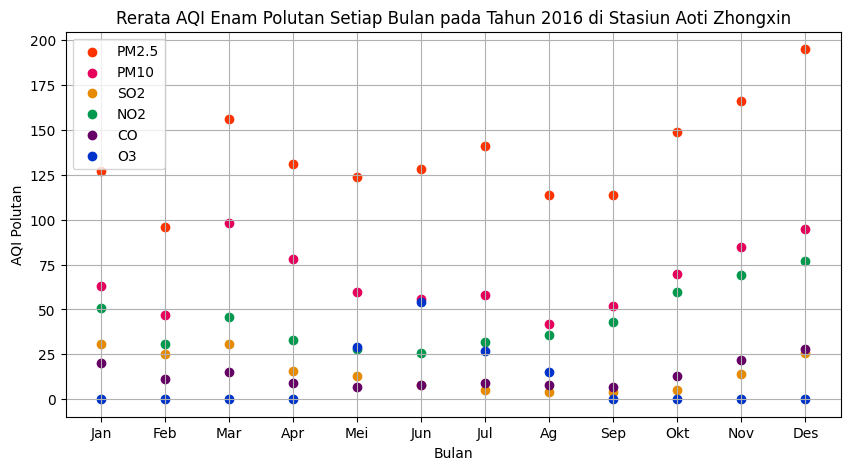

Range rerata AQI setiap bulan di stasiun Aoti Zhongxin berada pada nilai 96-195.
Polutan yang paling berpengaruh di setiap bulannya adalah sama yaitu jenis PM2.5

    PM2.5_AQI PM10_AQI SO2_AQI NO2_AQI CO_AQI O3_AQI  AQI    Polutan
Jan       129       64      28      48     17      0  129  PM2.5_AQI
Feb        94       48      22      32     10      0   94  PM2.5_AQI
Mar       154       91      28      52     14      0  154  PM2.5_AQI
Apr       141       79      15      41      9      0  141  PM2.5_AQI
Mei       137       63      13      38      9     19  137  PM2.5_AQI
Jun       126       54       7      34      8     20  126  PM2.5_AQI
Jul       128       53       6      29     10     15  128  PM2.5_AQI
Ag        120       48       4      37     11      7  120  PM2.5_AQI
Sep       119       52       6      47     10      0  119  PM2.5_AQI
Okt       150       77       9      60     14      0  150  PM2.5_AQI
Nov       174       93      21      67     21      0  174  PM2.5_AQI
Des      

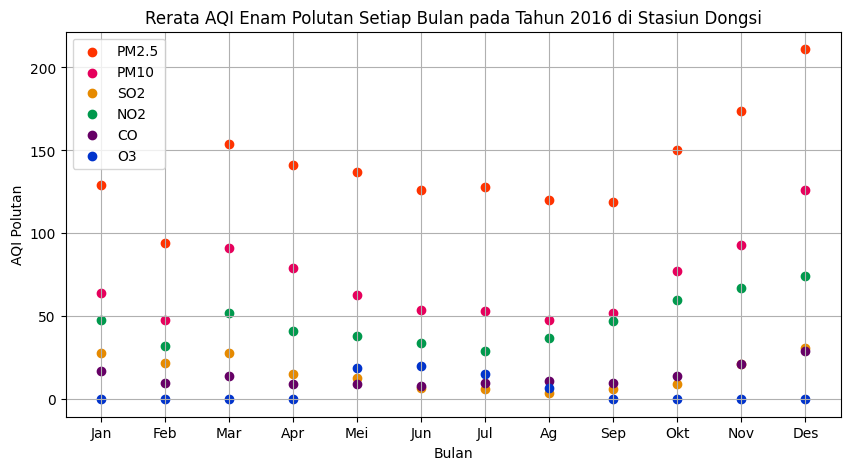

Range rerata AQI setiap bulan di stasiun Dongsi berada pada nilai 94-211.
Polutan yang paling berpengaruh di setiap bulannya adalah sama yaitu jenis PM2.5.

    PM2.5_AQI PM10_AQI SO2_AQI NO2_AQI CO_AQI O3_AQI  AQI    Polutan
Jan       128       63      33      54     17      0  128  PM2.5_AQI
Feb        93       45      21      38     10      0   93  PM2.5_AQI
Mar       151       92      27      58     14      0  151  PM2.5_AQI
Apr       140       86      16      45      9      0  140  PM2.5_AQI
Mei       128       72      14      38      8     28  128  PM2.5_AQI
Jun       139       64       8      38      9     40  139  PM2.5_AQI
Jul       142       63       7      36      9     11  142  PM2.5_AQI
Ag        118       53       6      39     10     11  118  PM2.5_AQI
Sep       118       56       5      48      9      0  118  PM2.5_AQI
Okt       150       76       7      61     13      0  150  PM2.5_AQI
Nov       172       96      19      68     19      0  172  PM2.5_AQI
Des       204  

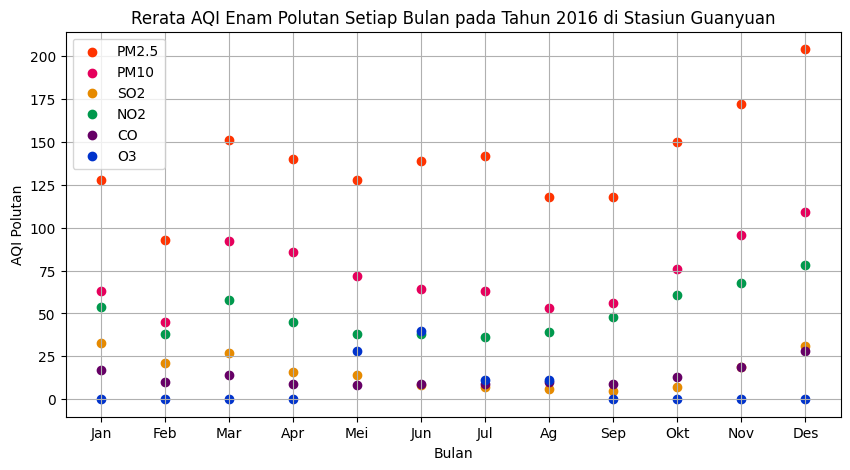

Range rerata AQI setiap bulan di stasiun Dongsi berada pada nilai 93-204.
Polutan yang paling berpengaruh di setiap bulannya adalah sama yaitu jenis PM2.5.


In [500]:
#Stasiun Aoti Zhongxin
aoti_aqi.loc['AQI'] = aoti_aqi.max()
aoti_aqi.loc['Polutan'] = aoti_aqi.idxmax()
aoti_aqi = aoti_aqi.transpose()
print(aoti_aqi)

#Membuat scatter plot untuk Rerata AQI Polutan di setiap bulan tahun 2016
plt.figure(figsize=(10, 5)) 
plt.scatter(aoti_aqi.index, aoti_aqi['PM2.5_AQI'], label='PM2.5', color="#FF3300")
plt.scatter(aoti_aqi.index, aoti_aqi['PM10_AQI'], label='PM10', color="#e6005c")
plt.scatter(aoti_aqi.index, aoti_aqi['SO2_AQI'], label='SO2', color="#e68a00")
plt.scatter(aoti_aqi.index, aoti_aqi['NO2_AQI'], label='NO2', color="#00994d")
plt.scatter(aoti_aqi.index, aoti_aqi['CO_AQI'], label='CO', color="#660066")
plt.scatter(aoti_aqi.index, aoti_aqi['O3_AQI'], label='O3', color="#0033cc")

plt.xlabel('Bulan')
plt.ylabel('AQI Polutan')
plt.title('Rerata AQI Enam Polutan Setiap Bulan pada Tahun 2016 di Stasiun Aoti Zhongxin')

plt.legend()
plt.grid(True)
plt.show()

#Menjawab pertanyaan
aoti_aqi_min = aoti_aqi['AQI'].astype(int).min()
aoti_aqi_max = aoti_aqi['AQI'].astype(int).max()
print("Range rerata AQI setiap bulan di stasiun Aoti Zhongxin berada pada nilai {}-{}.".format(aoti_aqi_min, aoti_aqi_max))
print("Polutan yang paling berpengaruh di setiap bulannya adalah sama yaitu jenis PM2.5")
print('')


##Stasiun Dongsi
dong_aqi.loc['AQI'] = dong_aqi.max()
dong_aqi.loc['Polutan'] = dong_aqi.idxmax()
dong_aqi = dong_aqi.transpose()
print(dong_aqi)

#Membuat scatter plot untuk Rerata AQI Polutan di setiap bulan tahun 2016
plt.figure(figsize=(10, 5)) 
plt.scatter(dong_aqi.index, dong_aqi['PM2.5_AQI'], label='PM2.5', color="#FF3300")
plt.scatter(dong_aqi.index, dong_aqi['PM10_AQI'], label='PM10', color="#e6005c")
plt.scatter(dong_aqi.index, dong_aqi['SO2_AQI'], label='SO2', color="#e68a00")
plt.scatter(dong_aqi.index, dong_aqi['NO2_AQI'], label='NO2', color="#00994d")
plt.scatter(dong_aqi.index, dong_aqi['CO_AQI'], label='CO', color="#660066")
plt.scatter(dong_aqi.index, dong_aqi['O3_AQI'], label='O3', color="#0033cc")

plt.xlabel('Bulan')
plt.ylabel('AQI Polutan')
plt.title('Rerata AQI Enam Polutan Setiap Bulan pada Tahun 2016 di Stasiun Dongsi')

plt.legend()
plt.grid(True)
plt.show()

#Menjawab pertanyaan
print("Range rerata AQI setiap bulan di stasiun Dongsi berada pada nilai {}-{}.".format(dong_aqi['AQI'].astype(int).min(), dong_aqi['AQI'].astype(int).max()))
print("Polutan yang paling berpengaruh di setiap bulannya adalah sama yaitu jenis PM2.5.")
print('')


##Stasiun Guanyu
guan_aqi.loc['AQI'] = guan_aqi.max()
guan_aqi.loc['Polutan'] = guan_aqi.idxmax()
guan_aqi = guan_aqi.transpose()
print(guan_aqi)

#Membuat scatter plot untuk Rerata AQI Polutan di setiap bulan tahun 2016
plt.figure(figsize=(10, 5)) 
plt.scatter(guan_aqi.index, guan_aqi['PM2.5_AQI'], label='PM2.5', color="#FF3300")
plt.scatter(guan_aqi.index, guan_aqi['PM10_AQI'], label='PM10', color="#e6005c")
plt.scatter(guan_aqi.index, guan_aqi['SO2_AQI'], label='SO2', color="#e68a00")
plt.scatter(guan_aqi.index, guan_aqi['NO2_AQI'], label='NO2', color="#00994d")
plt.scatter(guan_aqi.index, guan_aqi['CO_AQI'], label='CO', color="#660066")
plt.scatter(guan_aqi.index, guan_aqi['O3_AQI'], label='O3', color="#0033cc")

plt.xlabel('Bulan')
plt.ylabel('AQI Polutan')
plt.title('Rerata AQI Enam Polutan Setiap Bulan pada Tahun 2016 di Stasiun Guanyuan')

plt.legend()
plt.grid(True)
plt.show()

#Menjawab pertanyaan
print("Range rerata AQI setiap bulan di stasiun Dongsi berada pada nilai {}-{}.".format(guan_aqi['AQI'].astype(int).min(), guan_aqi['AQI'].astype(int).max()))
print("Polutan yang paling berpengaruh di setiap bulannya adalah sama yaitu jenis PM2.5.")

### Pertanyaan 2:
#### Berdasarkan rerata AQI tahunan 2016, termasuk kategori apa ketiga stasiun tersebut?

Mengategorikan AQI berdasarkan rerata AQI.

    PM2.5_AQI PM10_AQI SO2_AQI NO2_AQI CO_AQI O3_AQI  AQI    Polutan  \
Jan       127       63      31      51     20      0  127  PM2.5_AQI   
Feb        96       47      25      31     11      0   96  PM2.5_AQI   
Mar       156       98      31      46     15      0  156  PM2.5_AQI   
Apr       131       78      16      33      9      0  131  PM2.5_AQI   
Mei       124       60      13      28      7     29  124  PM2.5_AQI   
Jun       128       56       8      26      8     54  128  PM2.5_AQI   
Jul       141       58       5      32      9     27  141  PM2.5_AQI   
Ag        114       42       4      36      8     15  114  PM2.5_AQI   
Sep       114       52       4      43      7      0  114  PM2.5_AQI   
Okt       149       70       5      60     13      0  149  PM2.5_AQI   
Nov       166       85      14      69     22      0  166  PM2.5_AQI   
Des       195       95      26      77     28      0  195  PM2.5_AQI   

                                Kategori  
Jan  Tidak sehat unt

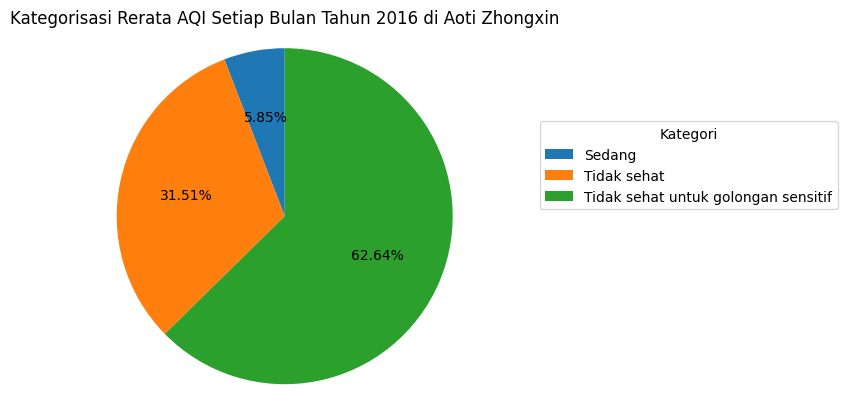

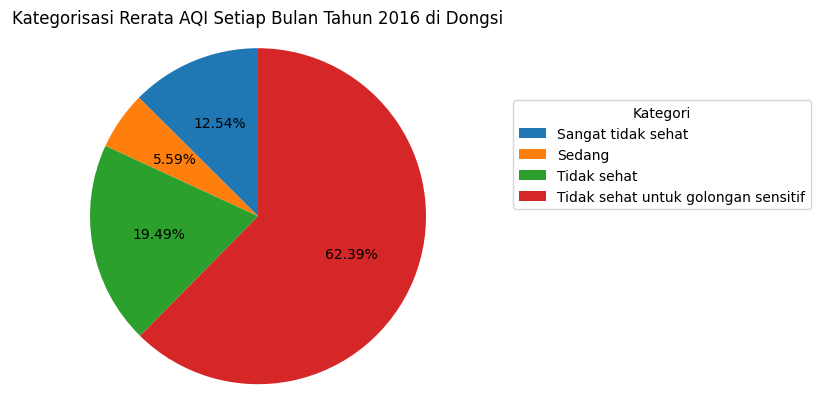

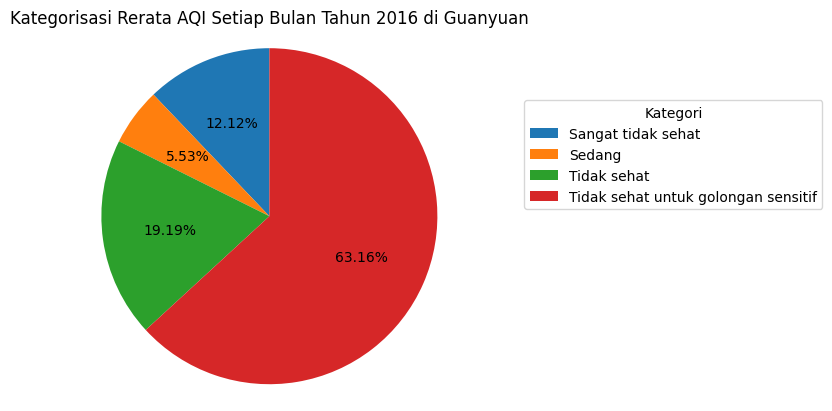

In [501]:
def kategori_aqi(AQI):
    #AQI = station_aqi['AQI']
    if 0 <= AQI <=50:
        return ("Baik")
    elif 50 < AQI <= 100:
        return ("Sedang")
    elif 100 < AQI <= 150:
        return ("Tidak sehat untuk golongan sensitif")
    elif 150 < AQI <= 200:
        return ("Tidak sehat")
    elif 200 < AQI <= 300:
        return ("Sangat tidak sehat")
    elif 301 < AQI <= 400:
        return ("Berbahaya")
    elif 400 < AQI <= 500:
        return ("Sangat berbahaya")

aoti_aqi['Kategori'] = aoti_aqi['AQI'].apply(kategori_aqi)
print (aoti_aqi)
print('')
print("Rerata AQI tahunan Stasiun Aoti Zhongxi 2016 sebesar", aoti_aqi['AQI'].mean().round().astype(int), 
     "dan berada pada kategori", kategori_aqi(aoti_aqi['AQI'].mean()))
print('')
print('')

dong_aqi['Kategori'] = dong_aqi['AQI'].apply(kategori_aqi)
print (dong_aqi)
print('')
print("Rerata AQI tahunan Stasiun Dongsi 2016 sebesar", dong_aqi['AQI'].mean().round().astype(int), 
     "dan berada pada kategori", kategori_aqi(dong_aqi['AQI'].mean()))
print('')
print('')

guan_aqi['Kategori'] = guan_aqi['AQI'].apply(kategori_aqi)
print (guan_aqi)
print('')
print("Rerata AQI tahunan Stasiun Guanyuan 2016 sebesar", guan_aqi['AQI'].mean().round().astype(int), 
     "dan berada pada kategori", kategori_aqi(guan_aqi['AQI'].mean()))


#Untuk visualisasi yang lebih detail, dapat ditunjukkan melalui diagram kategorisasi rerata AQI bulanan
#Membuat groupby() untuk mengelompokkan AQI sesuai kategori tanpa menjadikan pie chart terpecah

##Stasiun Aoti Zhongxin
grouped_aqi_aoti = aoti_aqi.groupby('Kategori')['AQI'].sum()

plt.pie(grouped_aqi_aoti, labels=None, autopct='%1.2f%%', startangle=90)
plt.title("Kategorisasi Rerata AQI Setiap Bulan Tahun 2016 di Aoti Zhongxin")
plt.axis('equal')
plt.legend(title='Kategori', labels = grouped_aqi_aoti.index, loc='lower left', bbox_to_anchor = (1,0.5))
plt.show()

##Stasiun Dongsi
grouped_aqi_dong = dong_aqi.groupby('Kategori')['AQI'].sum()

plt.pie(grouped_aqi_dong, labels=None, autopct='%1.2f%%', startangle=90)
plt.title("Kategorisasi Rerata AQI Setiap Bulan Tahun 2016 di Dongsi")
plt.axis('equal')
plt.legend(title='Kategori', labels = grouped_aqi_dong.index, loc='lower left', bbox_to_anchor = (1,0.5))
plt.show()

##Stasiun Guanyuan
grouped_aqi_guan = guan_aqi.groupby('Kategori')['AQI'].sum()

plt.pie(grouped_aqi_guan, labels=None, autopct='%1.2f%%', startangle=90)
plt.title("Kategorisasi Rerata AQI Setiap Bulan Tahun 2016 di Guanyuan")
plt.axis('equal')
plt.legend(title='Kategori', labels = grouped_aqi_guan.index, loc='lower left', bbox_to_anchor = (1,0.5))
plt.show()

## Conclusion

##### Pertanyaan 1: Berapa range rerata AQI di stasiun Aoti Zhongxin, Dongsi, dan Guanyuan selama tahun 2016 dan polutan apa yang paling berpengaruh?
- Range rerata AQI setiap bulan di stasiun Aoti Zhongxin berada pada nilai 95-195
- Range rerata AQI setiap bulan di stasiun Dongsi berada pada nilai 94-210
- Range rerata AQI setiap bulan di stasiun Dongsi berada pada nilai 92-204
- Seluruh nilai AQI setiap bulan di ketiga stasiun disebabkan oleh polutan PM2.5

##### Pertanyaan 2: Berdasarkan rerata AQI tahunan 2016, termasuk kategori apa ketiga stasiun tersebut?
- Rerata AQI tahunan Stasiun Aoti Zhongxi 2016 sebesar 136 dan berada pada kategori 'Tidak sehat untuk golongan sensitif'
- Rerata AQI tahunan Stasiun Dongsi 2016 sebesar 140 dan berada pada kategori 'Tidak sehat untuk golongan sensitif'
- Rerata AQI tahunan Stasiun Guanyuan 2016 sebesar 140 dan berada pada kategori 'Tidak sehat untuk golongan sensitif'


## Membuat file csv

Mengubah data frame yang sudah dibuat pada analisis data menjadi file csv dan menjadikannya satu folder untuk dashboard streamlit

In [502]:
#Data frame dengan rerata AQI polutan per hari
#Merger polutan harian Aoti Zhongxin
aoti_allday = pd.concat([aqi_month(new_aoti1), aqi_month(new_aoti2), aqi_month(new_aoti3),
                        aqi_month(new_aoti4), aqi_month(new_aoti5), aqi_month(new_aoti6),
                        aqi_month(new_aoti7), aqi_month(new_aoti8), aqi_month(new_aoti9),
                        aqi_month(new_aoti10), aqi_month(new_aoti11), aqi_month(new_aoti12), 
                        ])
aoti_allday.to_csv('aoti_allday.csv')

#Dongsi
dong_allday = pd.concat([aqi_month(new_dong1), aqi_month(new_dong2), aqi_month(new_dong3),
                        aqi_month(new_dong4), aqi_month(new_dong5), aqi_month(new_dong6),
                        aqi_month(new_dong7), aqi_month(new_dong8), aqi_month(new_dong9),
                        aqi_month(new_dong10), aqi_month(new_dong11), aqi_month(new_dong12),
                        ])
dong_allday.to_csv('dong_allday.csv')

#Guanyuan
guan_allday = pd.concat([aqi_month(new_guan1), aqi_month(new_guan2), aqi_month(new_guan3),
                        aqi_month(new_guan4), aqi_month(new_guan5), aqi_month(new_guan6),
                        aqi_month(new_guan7), aqi_month(new_guan8), aqi_month(new_guan9),
                        aqi_month(new_guan10), aqi_month(new_guan11), aqi_month(new_guan12),
                        ])
guan_allday.to_csv('guan_allday.csv')


#Data frame dengan rerata AQI polutan per bulan
aoti_aqi.to_csv('aoti_aqi.csv')
dong_aqi.to_csv('dong_aqi.csv')
guan_aqi.to_csv('guan_aqi.csv')

Memasukkan file ke dalam ZIP yang sudah ada

In [507]:
all_files = ['aoti_allday.csv', 'dong_allday.csv', 'guan_allday.csv',
             'aoti_aqi.csv', 'dong_aqi.csv', 'guan_aqi.csv']
folder = 'All_csv_files/'
for file in all_files:
    source = file
    target_folder = folder + file
    shutil.move(source, target_folder)